# Neural network from scratch

This notebook implements a neural network from scratch solving a simple classification problem of separating red and blue dots :-)

In [23]:
import numpy as np
import math

## Plotting the data and weights

The formula for the linear function that is going to separate the data is on the form

$$w_0x_1 + w_1x_2 + w_2 = 0$$

To graph this line we need to calculate x2 since we have w0, w1 and w2 ( or bias ) as inputs. x1 is a sequence along the x axis and x2 is the y coordinate that we get by solving for x2:

$$w_0x_1 + w_1x_2 + w_2 = 0$$

$$w_0x_1 + w_2 = - w_1x_2$$

$$\frac{(w_0x_1 + w_2)}{w_1} = -x_2$$

$$-{(w_0x_1 +w_2)}{w_1} = x_2$$

We can then calculate y and add a green dotted line to the graph to show how the network separates the red and blue dots.

In [24]:
def plot_result(data,labels,weigths,title):
    for point,label in zip(data,labels):
        x,y = point[0],point[1]
        if label == 0:
            plt.plot(x,y,'bo')
        if label == 1:
            plt.plot(x,y,'ro')
    
    xl = np.arange(-4,4,0.5)
    y = (weigths[0]*xl+weigths[2])/weights[1]
    plt.axis([-5,5,-5,5])
    plt.plot(xl, y, ':g')
    plt.title(title)
    plt.show()


Values of inital weights:
 [[0.64305115]
 [0.43216816]
 [0.16922889]]


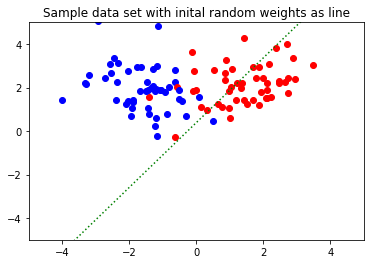

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets

# Let's get some data
# make_blobs will generate 100 samples of two classes 
data,labels = datasets.make_blobs(centers=[(-1.5,2),(1.5,2)])

# Add 1 for the bias to the data
bias = np.ones([100,1])
data = np.append(data,bias,axis=1)

# We are living in 2D space so we need 2 weights + a weight for the bias
def initialize_weights():
    ndim = 2
    weights = np.random.rand(ndim+1,1)
    print(f'Values of inital weights:\n {weights}')
    return weights

weights = initialize_weights()
plot_result(data,labels,weights,'Sample data set with inital random weights as line')

## The math

The cell below implements the math we need to do the feed forward process and the back propagation.

In [26]:
# The math needed to make this work
def sigmoid(x):
    return 1/(1+math.exp(x*-1))

# If x >= 0 the point was classified as a red point, if it is < 0 it was classified
# as a blue point
def step(x):
    if x >= 0:
        return 1
    else:
        return 0
    
def softmax(x):
    denominator = 0
    list = []
    # Find the sum of the exponantial for each element in x
    for i in range(len(x)):
        denominator += math.exp(x[i])

    # Calculate the softmax for each element in x
    for i in range(len(L)):
        list.append(math.exp(x[i])/denominator)
    
    return list

# This is our peceptron which is just a matrix multiplication of inputs and weights.
def perceptron(inputs, weights):
    return np.dot(inputs,weights)

# Based on the point, weights and prediction we adjust the weights so the line
# gets a little bit closer to the point.
def come_closer(point,w,prediction,learn_rate=0.1):
    if prediction == 0:
        w[0] += point[0]*learn_rate
        w[1] += point[1]*learn_rate
        w[2] += learn_rate
    else:
        w[0] -= point[0]*learn_rate
        w[1] -= point[1]*learn_rate
        w[2] -= learn_rate
    return w

## Training

The cell below implements the training loop. 

In each epoch the percetron calculates the a value and we apply the step function to determine the class.

Training for a maximum of 20 epochs
Accuracy after epoch 1 92/100: 0.92
Accuracy after epoch 2 92/100: 0.92
Accuracy after epoch 3 90/100: 0.9


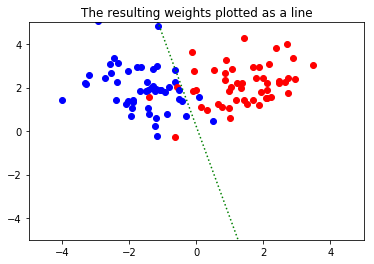

Final weights:
[[ 0.62220354]
 [-0.14890975]
 [-0.03077111]]
Best accuracy: 92.0%


In [27]:
learn_rate = 0.1
epoch = 20
length = data.shape[0]

best_accuracy = 0
newweights = weights
print(f'Training for a maximum of {epoch} epochs')
for i in range(epoch):
    correct = 0
    for point,label in zip(data,labels):
        # Do the forward pass
        pout = perceptron(point,newweights)

        # Apply the step function to determine if the point was correctly classified
        prediction = step(pout)
        
        # If prediction matches the label everything is ok, else we adjust th weights
        # so the line moves closer to the point. We also count correctly classified points
        if prediction == label:
            correct += 1
        else:
            newweights = come_closer(point,newweights,prediction,learn_rate)

    accuracy = correct/length
    print(f'Accuracy after epoch {i+1} {correct}/{length}: {correct/length}')
    
    # We stop training when the accuracy has stopped improving
    if(best_accuracy > accuracy):
        break
    best_accuracy = accuracy
    newweights = weights
    
plot_result(data,labels,newweights,'The resulting weights plotted as a line')

print(f'Final weights:\n{newweights}')
print(f'Best accuracy: {best_accuracy*100}%')